In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [43]:
# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

Text(0, 0.5, 'kinh nghiệm (năm)')

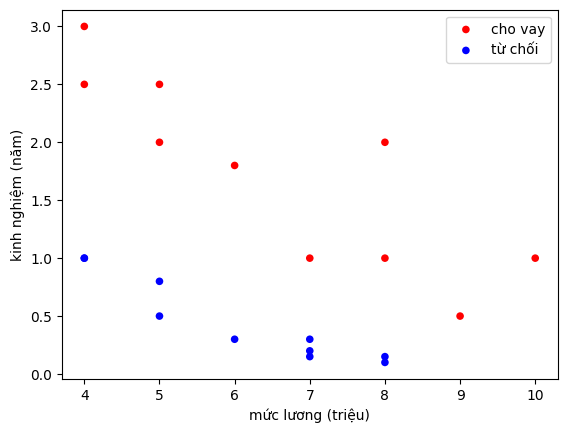

In [44]:
# Vẽ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [45]:
x = np.hstack((np.ones((N, 1)), x))
x

array([[ 1.  , 10.  ,  1.  ],
       [ 1.  ,  5.  ,  2.  ],
       [ 1.  ,  6.  ,  1.8 ],
       [ 1.  ,  7.  ,  1.  ],
       [ 1.  ,  8.  ,  2.  ],
       [ 1.  ,  9.  ,  0.5 ],
       [ 1.  ,  4.  ,  3.  ],
       [ 1.  ,  5.  ,  2.5 ],
       [ 1.  ,  8.  ,  1.  ],
       [ 1.  ,  4.  ,  2.5 ],
       [ 1.  ,  8.  ,  0.1 ],
       [ 1.  ,  7.  ,  0.15],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.8 ],
       [ 1.  ,  7.  ,  0.3 ],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.5 ],
       [ 1.  ,  6.  ,  0.3 ],
       [ 1.  ,  7.  ,  0.2 ],
       [ 1.  ,  8.  ,  0.15]])

In [46]:
w = np.array([0.,0.1,0.1]).reshape(-1,1)
w

array([[0. ],
       [0.1],
       [0.1]])

In [47]:
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01

for i in range(1, numOfIteration):   
	# Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y)	 
    print(cost[i])

[14.3783222]
[14.37536009]
[14.52617153]
[14.51426849]
[14.61633124]
[14.45526156]
[14.40335079]
[14.14832828]
[13.97986699]
[13.71835467]
[13.48635327]
[13.25428121]
[12.99278425]
[12.79528802]
[12.52560943]
[12.35759173]
[12.09391963]
[11.94844506]
[11.70025271]
[11.57135333]
[11.34455593]
[11.22796382]
[11.02570355]
[10.91881102]
[10.74211332]
[10.64364326]
[10.49198407]
[10.40156765]
[10.27334863]
[10.19110203]
[10.08403294]
[10.01018498]
[9.92158252]
[9.85619039]
[9.78321018]
[9.72599049]
[9.66581037]
[9.61609685]
[9.56606508]
[9.52287899]
[9.48063066]
[9.44282419]
[9.40636077]
[9.37277831]
[9.34050283]
[9.31011155]
[9.28081799]
[9.252781]
[9.22560668]
[9.19929876]
[9.1736558]
[9.14863912]
[9.12414184]
[9.10012349]
[9.07652441]
[9.05331276]
[9.03045303]
[9.007922]
[8.98569682]
[8.96376049]
[8.94209698]
[8.92069328]
[8.8995372]
[8.87861825]
[8.85792654]
[8.83745323]
[8.81718992]
[8.79712892]
[8.77726292]
[8.7575851]
[8.73808899]
[8.71876849]
[8.69961781]
[8.68063146]
[8.66180423]
[

In [48]:
print(w[0])
print(w[1])
print(w[2])

[-7.25683504]
[0.62975152]
[3.6436906]


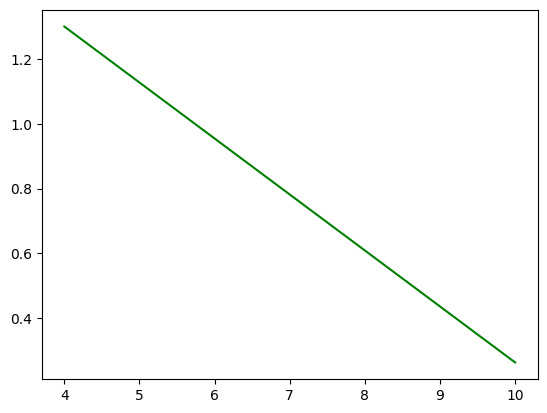

In [49]:
# Vẽ đường phân cách
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

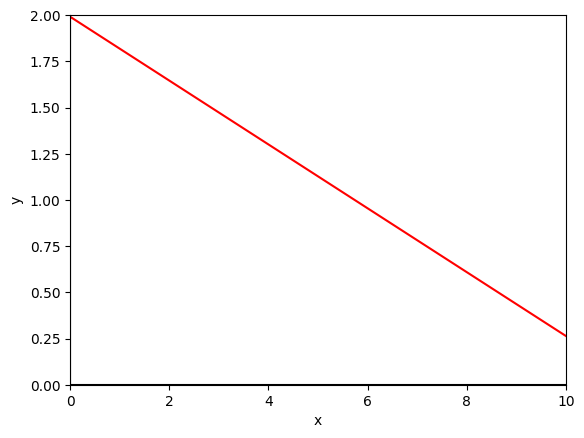

In [51]:
z = np.linspace(0, 10, 400)
y = -(w[0]+z*w[1]+ np.log(1/t-1))/w[2]

plt.plot(z, y, '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.show()

In [55]:
Y = []
N = []
for i in x:
    if w[0]+i[1]*w[1]+w[2]*i[2]+np.log(1/t-1) > 0:
        Y.append(i)
    else:
        N.append(i)

In [64]:
Y = [Y[1:] for Y in Y]
Y

[array([10.,  1.]),
 array([5., 2.]),
 array([6. , 1.8]),
 array([7., 1.]),
 array([8., 2.]),
 array([9. , 0.5]),
 array([4., 3.]),
 array([5. , 2.5]),
 array([8., 1.]),
 array([4. , 2.5])]

In [65]:
N = [N[1:] for N in N]
N

[array([8. , 0.1]),
 array([7.  , 0.15]),
 array([4., 1.]),
 array([5. , 0.8]),
 array([7. , 0.3]),
 array([4., 1.]),
 array([5. , 0.5]),
 array([6. , 0.3]),
 array([7. , 0.2]),
 array([8.  , 0.15])]

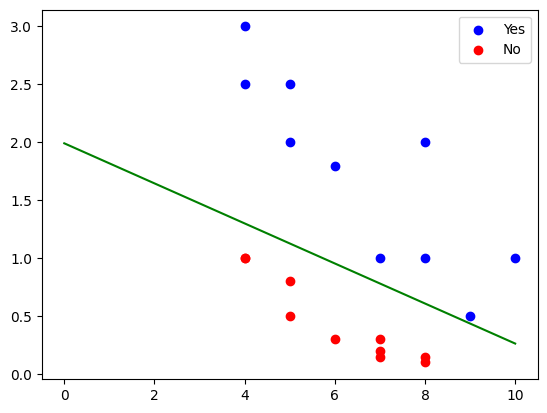

In [70]:
# Extract x and y values from the arrays
x1, y1 = zip(*Y)
x2, y2 = zip(*N)

# Plotting the data from the arrays
plt.scatter(x1, y1, color='b', label='Yes')
plt.scatter(x2, y2, color='r', label='No')
plt.plot((0, 10),(-(w[0]+0*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.legend()  # Show legend
plt.show()    # Display the plot